In [ ]:
! wget https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b -O PBC_dataset_normal_DIB.zip

--2021-04-26 17:23:11--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/5a5a3b1a-0b1d-46bc-bff2-0420599d351b
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.80.163
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.80.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281366219 (268M) [application/zip]
Saving to: ‘PBC_dataset_normal_DIB.zip’

PBC_dataset_normal_ 100%[===================>] 268.33M  20.3MB/s    in 15s     

2021-04-26 17:23:27 (18.0 MB/s) - ‘PBC_dataset_normal_DIB.zip’ saved [281366219/281366219]



In [ ]:
! unzip -qq PBC_dataset_normal_DIB.zip

In [39]:
import glob
import cv2, numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [40]:
sub_folders = glob.glob('PBC_dataset_normal_DIB/*')

In [54]:
total_files_list = []
total_img_cnts = 0
for folders in sub_folders:
    if folders.split('/')[1] == 'platelet':
        continue
    else:
        print(folders)
        files_from_folders = glob.glob('{}/*'.format(folders))
        total_img_cnts += len(files_from_folders)
        print(len(files_from_folders))
        for files in files_from_folders:
            total_files_list.append(files)
    
print("Total img cnts. = ",total_img_cnts)

PBC_dataset_normal_DIB/monocyte
1420
PBC_dataset_normal_DIB/eosinophil
3117
PBC_dataset_normal_DIB/ig
2895
PBC_dataset_normal_DIB/basophil
1218
PBC_dataset_normal_DIB/lymphocyte
1214
PBC_dataset_normal_DIB/neutrophil
3329
PBC_dataset_normal_DIB/erythroblast
1551
Total img cnts. =  14744


In [55]:
image = cv2.imread(total_files_list[0])
print("Shape = ",image.shape)

Shape =  (363, 360, 3)


In [56]:
H_2 , W_2 = int(363/2), 360/2
print(H_2,W_2)

181 180.0


Shape =  (363, 360, 3)


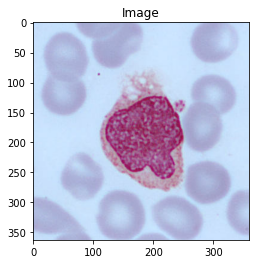

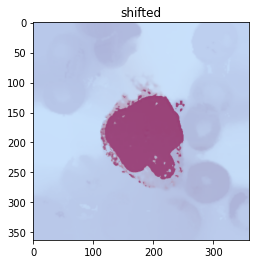

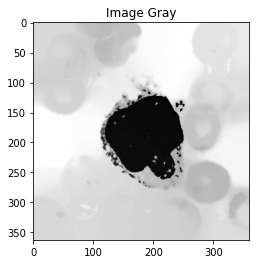

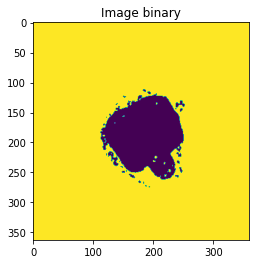

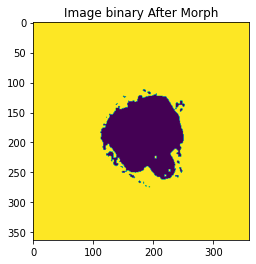

Max =  255


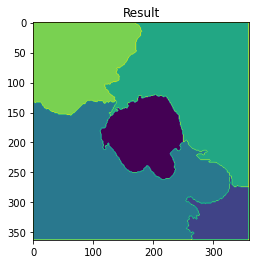

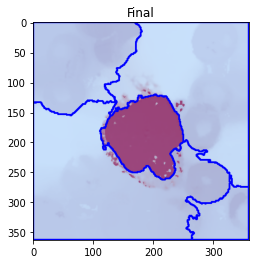

In [57]:
import sys
import cv2
import numpy
from scipy.ndimage import label

def segment_on_dt(a, img):
    border = cv2.dilate(img, None, iterations=5)
    border = border - cv2.erode(border, None)

    dt = cv2.distanceTransform(img, 2, 3)
    dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(numpy.uint8)
    _, dt = cv2.threshold(dt, 180, 255, cv2.THRESH_BINARY)
    lbl, ncc = label(dt)
    lbl = lbl * (255 / (ncc + 1))
    # Completing the markers now. 
    lbl[border == 255] = 255

    lbl = lbl.astype(numpy.int32)
    cv2.watershed(a, lbl)

    lbl[lbl == -1] = 0
    lbl = lbl.astype(numpy.uint8)
    return 255 - lbl

image = cv2.imread(total_files_list[100])
print("Shape = ",image.shape)

# image = cv2.GaussianBlur(image, (3, 3), 0)
img = image.copy()
plt.title("Image")
plt.imshow(img)
plt.show()  

# Pre-processing.
shifted = cv2.pyrMeanShiftFiltering(img, 50, 50)
plt.title("shifted")
plt.imshow(shifted)
plt.show()
img = shifted.copy()

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
plt.title("Image Gray")
plt.imshow(img_gray,cmap='gray')
plt.show()  

_, img_bin = cv2.threshold(img_gray, 0, 255,
        cv2.THRESH_OTSU)
plt.title("Image binary")
plt.imshow(img_bin)
plt.show()

img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN,
        numpy.ones((3, 3), dtype=int))

plt.title("Image binary After Morph")
plt.imshow(img_bin)
plt.show()
img_bin_cpy = img_bin.copy()
print("Max = ",img_bin_cpy.max())
result = segment_on_dt(img, img_bin)
plt.title("Result")
plt.imshow(result)
plt.show()

#cv2.imwrite(sys.argv[2], result)

result[result != 255] = 0
result = cv2.dilate(result, None)
img[result == 255] = (0, 0, 255)
#cv2.imwrite(sys.argv[3], img)
plt.title("Final")
plt.imshow(img)
plt.show()




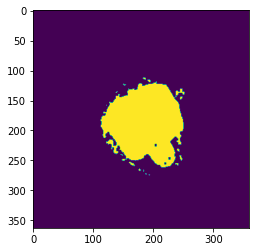

In [58]:
img_bin_inv = 255-img_bin_cpy
plt.imshow(img_bin_inv)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


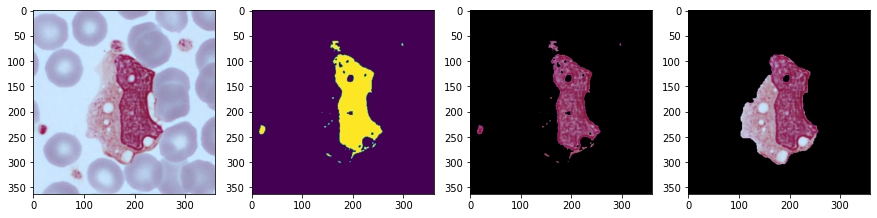

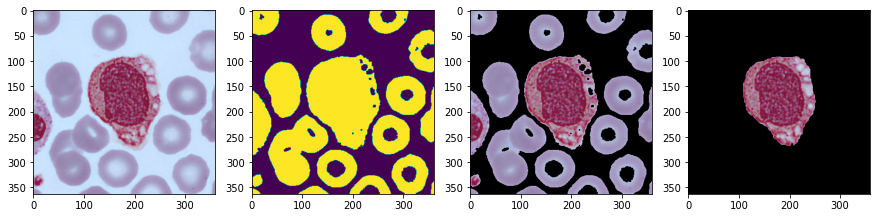

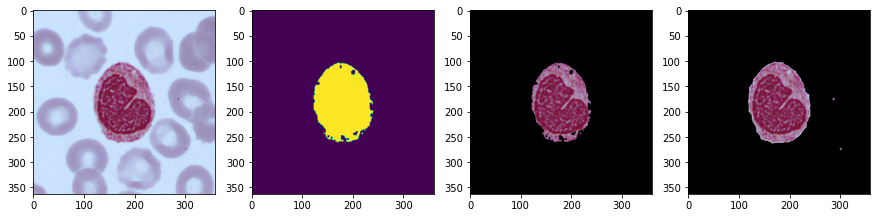

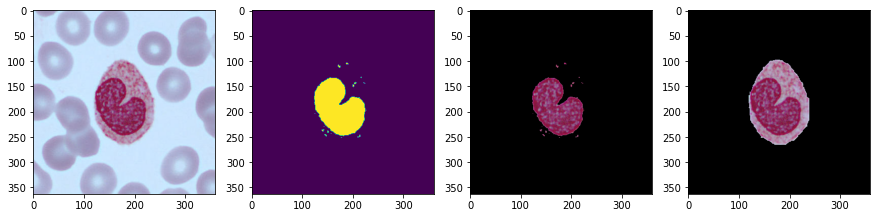

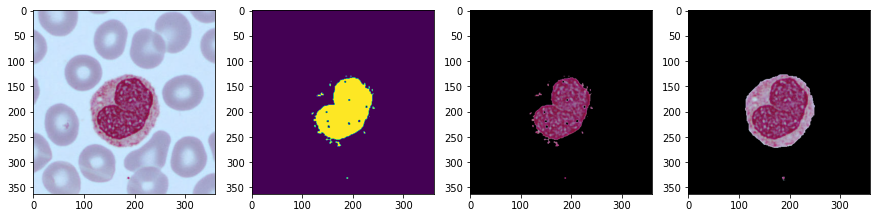

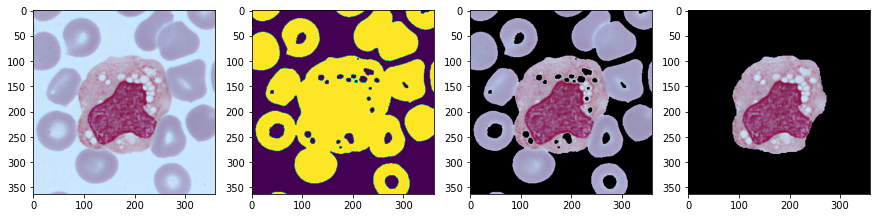

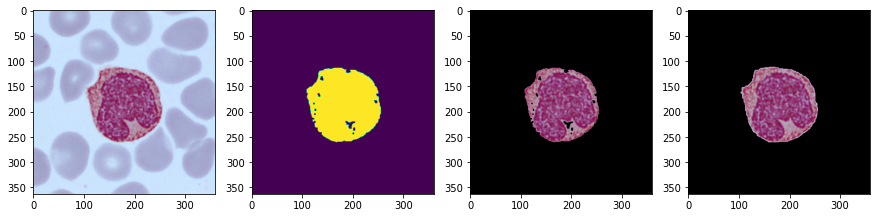

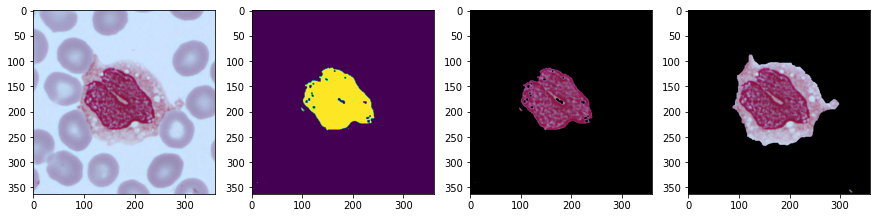

In [ ]:
#######################
# 1420
# PBC_dataset_normal_DIB/eosinophil
# 3117
# PBC_dataset_normal_DIB/ig
# 2895
# PBC_dataset_normal_DIB/basophil
# 1218
# PBC_dataset_normal_DIB/lymphocyte
# 1214
# PBC_dataset_normal_DIB/neutrophil
# 3329
# PBC_dataset_normal_DIB/erythroblast
# 1551
#######################


for image_names in total_files_list[1218:1228]:
    image = cv2.imread(image_names)
    #print("Shape = ",image.shape)

    # image = cv2.GaussianBlur(image, (3, 3), 0)
    img = image.copy() 

    # Pre-processing.
    shifted = cv2.pyrMeanShiftFiltering(img, 50, 50)
    img = shifted.copy()

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  

    _, img_bin = cv2.threshold(img_gray, 0, 255,
            cv2.THRESH_OTSU)

    img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN,
            numpy.ones((3, 3), dtype=int))

    img_bin_cpy = img_bin.copy()
    mask = 255-img_bin_cpy
    
    
    # mask_ = np.zeros(image.shape)
    # mask_[:,:,0] = mask.copy()
    # mask_[:,:,1] = mask.copy()
    # mask_[:,:,2] = mask.copy()
    masked = cv2.bitwise_and(image,image, mask=mask)
    #masked = image*mask_

    # contours, hier = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    # for cnt in contours:
        
    #     if 200<cv2.contourArea(cnt)<5000:
    #         cv2.drawContours(image,[cnt],0,(0,255,0),2)
    #         cv2.drawContours(mask,[cnt],0,255,-1)

    plt.figure(figsize=(15,5))
    plt.subplot(1,4,1)
    plt.imshow(image)
    plt.subplot(1,4,2)
    plt.imshow(mask)
    plt.subplot(1,4,3)
    plt.imshow(masked)
    plt.subplot(1,4,3)
    plt.imshow(masked)
   

    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (int(H_2-100),int(W_2-100),int(H_2+100),int(W_2+100))
    cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    image = image*mask2[:,:,np.newaxis]
    #plt.imshow(image),plt.colorbar(),plt.show()
    plt.subplot(1,4,4)
    plt.imshow(image)
    plt.show()
    
    


[103.98087583  63.37777162 153.62389135] 2.76%
[230.53056235 201.97748925 183.46614957] 9.11%
[187.77609989 151.35588713 159.83086909] 16.94%
[208.39941724 171.9632711  170.49185293] 19.96%
[253.40881931 229.65472634 200.63039257] 51.24%


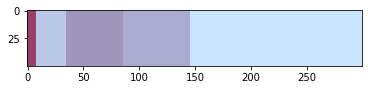

[array([103.98087583,  63.37777162, 153.62389135]), array([230.53056235, 201.97748925, 183.46614957]), array([187.77609989, 151.35588713, 159.83086909]), array([208.39941724, 171.9632711 , 170.49185293]), array([253.40881931, 229.65472634, 200.63039257])]


In [ ]:
get_top_two = []
# A colour clustering based method
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    
    for (percent, color) in colors:
        print(color, "{:0.2f}%".format(percent * 100))
        get_top_two.append(color)
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

# Load image and convert to a list of pixels
image = cv2.imread(total_files_list[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
reshape = image.reshape((image.shape[0] * image.shape[1], 3))

# Find and display most dominant colors
cluster = KMeans(n_clusters=5).fit(reshape)
visualize = visualize_colors(cluster, cluster.cluster_centers_)
visualize = cv2.cvtColor(visualize, cv2.COLOR_RGB2BGR)
plt.imshow(visualize)
plt.show()
# cv2.imshow('visualize', visualize)
# cv2.waitKey()
print(get_top_two)


In [ ]:
r_1 = get_top_two[0][0]
g_1 = get_top_two[0][1]
b_1 = get_top_two[0][2]

r_2 = get_top_two[1][0]
g_2 = get_top_two[1][1]
b_2 = get_top_two[1][2]

print(r_1,",",g_1,",",b_1)
print(r_2,",",g_2,",",b_2)

103.98087583149002 , 63.37777161861516 , 153.62389135254926
230.53056234718863 , 201.97748925048595 , 183.46614956580385


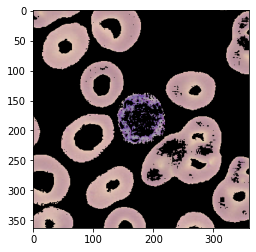

In [ ]:
# define range of blue color in HSV
lower_blue = np.array([r_1,g_1,b_1])
upper_blue = np.array([r_2,g_2,b_2])
# delta = 10
# upper_blue = np.array([r_1+delta,g_1+delta,b_1+delta])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(image, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image,image, mask= mask)

plt.imshow(res)
plt.show()